# IESTI01_Audio_Raw_Data_Analisys
- M.Rovai @23Nov2021

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import librosa
import librosa.display
import IPython.display

## Analizyng Audio raw sample

- From Edge Impulse Studio `Data Aquisition - Export Data` Tab, download to your computer a zip file with the .wav raw data captured.
- Upload on /content one (or more) .wav samples

In [2]:
!ls /content

itajuba.2l41mp43.ingestion-69d8759d9d-vzkql.s2.wav
sample_data
unifei.2l41jemm.ingestion-69d8759d9d-vzkql.s2.wav


In [3]:
unifei_sound_path = '/content/unifei.2l41jemm.ingestion-69d8759d9d-vzkql.s2.wav'
itajuba_sound_path = '/content/itajuba.2l41mp43.ingestion-69d8759d9d-vzkql.s2.wav'

In [4]:
unifei_audio, sample_rate = librosa.load(unifei_sound_path, sr=16_000)
itajuba_audio, sample_rate = librosa.load(itajuba_sound_path, sr=16_000)
sample_rate

16000

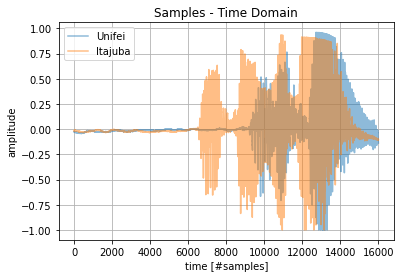

In [6]:
plt.plot(unifei_audio, alpha=0.5, label='Unifei')
plt.plot(itajuba_audio, alpha=0.5, label='Itajuba')
plt.legend()
plt.grid(True)
plt.title('Samples - Time Domain')
plt.xlabel('time [#samples]')
plt.ylabel('amplitude')
plt.show();

In [7]:
IPython.display.Audio(data=unifei_audio, rate=sample_rate)

In [8]:
IPython.display.Audio(data=itajuba_audio, rate=sample_rate)

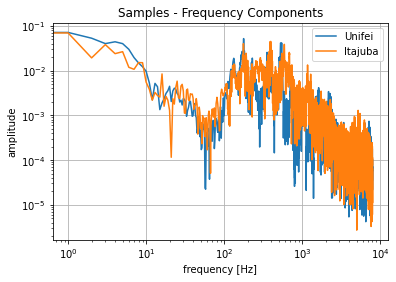

In [9]:
plt.plot(2.0/sample_rate * np.abs(scipy.fftpack.fft(unifei_audio)[:sample_rate//2]), label='Unifei');
plt.plot(2.0/sample_rate * np.abs(scipy.fftpack.fft(itajuba_audio)[:sample_rate//2]), label='Itajuba')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.title('Samples - Frequency Components')
plt.xlabel('frequency [Hz]')
plt.ylabel('amplitude')
plt.show();

In [10]:
 def fft(data, N=sample_rate, title = '', x_log=True, y_log=True):  
    yf = scipy.fftpack.fft(data)
    plt.plot(2.0/N * np.abs(yf[:N//2]))
    plt.xlabel('frequency [Hz]')
    plt.ylabel('amplitude')
    if x_log: plt.xscale('log')
    if y_log: plt.yscale('log')
    plt.grid(True)
    plt.title(title+' sample - Frequency Components')
    plt.show();

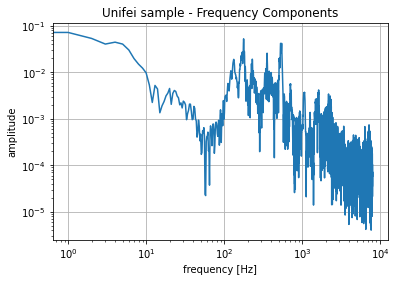

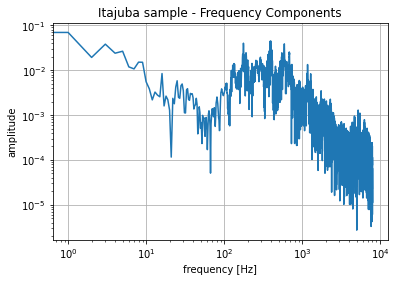

In [11]:
fft(unifei_audio, sample_rate, title = 'Unifei', x_log=True, y_log=True)
fft(itajuba_audio, sample_rate, title = 'Itajuba', x_log=True, y_log=True)

In [12]:
 def spectogram(data, NFFT=256, Fs=sample_rate, title=''):
    plt.specgram(data, NFFT, Fs)
    plt.xlabel('time (s)')
    plt.ylabel('frequency [Hz]')
    plt.title(title+' sample - Spectogram')
    plt.show();

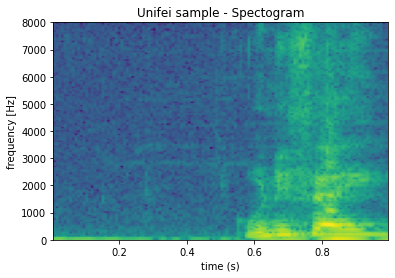

In [13]:
spectogram(unifei_audio, title='Unifei')

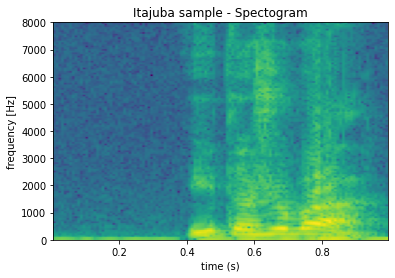

In [14]:
spectogram(itajuba_audio, title='Itajuba')